<h2><strong> Titanic </strong><h2>
    <h3> A/B Test of an age of survivors</h3>
    <p>The purpose of this research is to find out if an age influences the probability of survival on a board of Titanic.<p>

<p>First of all, let's upload some important classes and the database</p>

In [322]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
# upload the Database
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [323]:
# it's better to interpret "PassengerID" as a database's "id"
titanic = titanic.set_index('PassengerID')
titanic

,Name,PClass,Age,Sex,Survived,SexCode
PassengerID,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...
1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1311,"Zenni, Mr Philip",3rd,22.00,male,0,0


If a grouping by "Survived" is made, we can see a ratio of survivors to the drowned.

In [325]:
titanic_all = titanic.groupby('Survived')['Name'].count()
titanic_all

Survived
0    863
1    450
Name: Name, dtype: int64

It is seen that only around third part has survived. 

In [326]:
t_Survived = titanic['Survived']
t_Survived

PassengerID
1       1
2       0
3       0
4       0
5       1
       ..
1309    0
1310    0
1311    0
1312    0
1313    0
Name: Survived, Length: 1313, dtype: int64

But, let's compute a probability of survival, which is equal to an math expectation (mu), and it is standard deviation (sigma).

In [327]:
def t_stats(Survived):
    mean = Survived.mean()
    std = np.std(Survived, ddof=0)
    return mean, std
mu, sigma = t_stats(t_Survived)
mu, sigma

(0.3427265803503427, 0.4746209766452625)

<p>So, now it's time to make hypothesis of the research:</p>
<ul>
    <li>(H<sub>0</sub>) - there is no difference between total survivors and survivors of any distinct age. i.e. an age does not influence survival.</li> 
    <li>(H<sub>1</sub>) - there is difference between total survivors and survivors of some distinct age. i.e. an age influences survival</li>
</ul>
<p>Unfortunately, not all information about the age of passengers has been found. <br>To make more accurate calculations let's drop rows with an indeterminate age.<p>
    


In [328]:
titanic = titanic[titanic['Age'].notnull()]
titanic

,Name,PClass,Age,Sex,Survived,SexCode
PassengerID,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...
1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1311,"Zenni, Mr Philip",3rd,22.00,male,0,0


Now, since we have just a half of a total number of passengers it is better to take an age range instead of a certain age: 

In [330]:
def titanic_age(min_age = None, max_age=None):
    if max_age == None and min_age >=0:
        set_value = titanic[(titanic['Age'] >= min_age)]['Survived'] 
    elif min_age == None:
        set_value = titanic[(titanic['Age'] <= max_age)]['Survived'] 
    elif min_age>=0:
        set_value = titanic[(titanic['Age'] <= max_age) & (titanic['Age']>=min_age)]['Survived']
    else:
        Error = "Age Error"
    return set_value

That function allows us to enter an age range which we want to explore. As an example minor children of 0-18 were taken.

In [332]:
Age = titanic_age(0, 18)
len(Age)

126

In [333]:
mean, std = t_stats(Age)
mean, std

(0.5476190476190477, 0.497727260961116)

126 children have been on a board and only 55% has survived. That's quite more than total probability of surviving - 34%. it is seen that effect size quite high, but can we say that difference is statistically significant? To verify it let's compute a minimum required sample taking alpha=0.1:

In [334]:
def required_n(mu, mean):
    effect_size = sms.proportion_effectsize(mu, mean)    
    required_n = sms.NormalIndPower().solve_power(effect_size, power=0.8, alpha=0.1, ratio=1)       
    return ceil(required_n)
required_n(mu, mean)

72

Since 126 > 72, it is possible to assume that we will get an accurete result of the research for this sample. Let's move to the calculations of p-value and z-statistics:

In [335]:
def function_of_z_p(x, n, mu=0, sigma=1):
    global Normal
    z = abs((x - mu)/(sigma/n**0.5))
    Normal = stats.norm()
    p = 1 - (Normal.cdf(z) - Normal.cdf(-z))
    return z, p
z, p = function_of_z_p(mean, len(Age), mu, sigma)
z, p 


(4.845787173603679, 1.261106497896236e-06)

Plot a graph of z-ststistics:

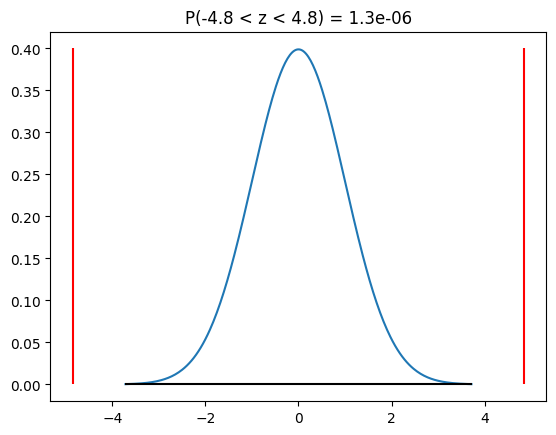

In [263]:
def graph_of_z_p(z, p):
    fig, ax = plt.subplots()
    x = np.linspace(Normal.ppf(0.0001), Normal.ppf(0.9999), 300)
    ax.plot(x, Normal.pdf(x))
    ax.hlines(0, x.min(), x.max(), color='k')
    ax.vlines([-z, z], 0, 0.4, color='r')
    x_less_z, x_more_z = x[x<-z], x[x>z]
    ax.fill_between(x_less_z, Normal.pdf(x_less_z), np.zeros(len(x_less_z)), alpha=0.3, color='b')
    ax.fill_between(x_more_z, Normal.pdf(x_more_z), np.zeros(len(x_more_z)), alpha=0.3, color='b')
    ax.set_title('P({:.2} < z < {:.2}) = {:.2}'.format(-z, z, p)); 
graph_of_z_p(z, p)

<p>As it is seen from the graph p-value less than alpha and tends to 0 which means that our 55% of survival is statisticaly significant and (H<sub>0</sub>) for minor children can be rejected.</p> 
We can also compute confidence interval of 90%:


In [336]:
def confidence_interval(Age):
    success = Age.sum()
    nobs = Age.count()
    CI = proportion_confint(success, nobs = nobs, alpha=0.1)
    return np.round(CI, 3)
confidence_interval(Age)

array([0.475, 0.621])

The values of confidence interval approve that math expectation (mu) of population is not included inside, that means we rejected (H<sub>0</sub>) correctly.

Maybe, if we take another age range the results will be different? As an example retired people were considered. 

In [338]:
def age(min_age = None, max_age=None):
    f = titanic_age(min_age, max_age)
    CI = confidence_interval(f)
    mean, std = t_stats(f)
    N = len(f)
    required_N = required_n(mu, mean)
    z, p = function_of_z_p(mean, N, mu, sigma)
    return N, np.round(mean, 3), np.round(std, 3), required_N, p, CI, z
age_retired = age(60, None)
print(f'N = {age_retired[0]}, mean = {age_retired[1]}, std = {age_retired[2]}, required_N = {age_retired[3]}, p = {age_retired[4]}, CI = {age_retired[5]}, z = {age_retired[6]}')

N = 27, mean = 0.333, std = 0.471, required_N = 31356, p = 0.9180920952446923, CI = [0.184 0.483], z = 0.10283730733838893


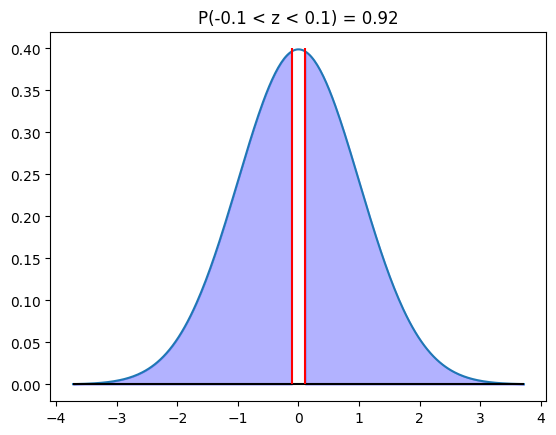

In [339]:
graph_of_z_p(age_retired[6], age_retired[4])

<p>As it is seen from the graph p-value of a retired people sample much higher than alpha.</p><p> But we all so can see that a number of our sample is not as much as required one (27 against 31356).</p> <p> We assume that if we had got 31356 people for our sample the results could have been statisticaly significant. But since (mean) of ritered people &asymp; (mu) of population it is possible to make a statement that we have one of many random samples and definetely can not reject (H<sub>0</sub>)</p>

It is possilbe to apply this research to any type age range. Let's take the most interesting ones. 

In [340]:
Min_Age = [0, 12, 0, 18, 30, 18, 30, 45, 60]
Max_Age = [4, 16, 18, 30, 45, 45, 60, 60, None]
Range_of_Age_to_survive = pd.DataFrame( columns = ['Number of People', 'Probability of Survivig', 'Standard deviation', 'Required N', 'P-value', 'Confidence interval'])
for Min, Max in zip(Min_Age, Max_Age):
    N, mean, std, required, p, Ci, z = age(Min, Max)
    p = np.round(p, 3)
    Range_of_Age = f'{Min}-{Max}'
    Range_of_Age_to_survive.loc[Range_of_Age] = [N, mean, std, required, p, Ci]
Range_of_Age_to_survive
    

,Number of People,Probability of Survivig,Standard deviation,Required N,P-value,Confidence interval
0-4,33,0.788,0.409,15,0.000,"[0.671, 0.905]"
12-16,25,0.560,0.496,64,0.022,"[0.397, 0.723]"
0-18,126,0.548,0.498,72,0.000,"[0.475, 0.621]"
18-30,336,0.342,0.474,12895219,0.986,"[0.3, 0.385]"
30-45,235,0.409,0.492,669,0.034,"[0.356, 0.461]"
18-45,540,0.376,0.484,2582,0.104,"[0.342, 0.41]"
30-60,333,0.429,0.495,389,0.001,"[0.385, 0.474]"
45-60,118,0.492,0.500,135,0.001,"[0.416, 0.567]"
60-None,27,0.333,0.471,31356,0.918,"[0.184, 0.483]"


<strong>Conclusions:</strong> The table above shows that the probability of samples: 
<ul>
    <li>0-4, 0-18 age is definitely statistically significant;</li>
    <li>12-16, 30-45, 30-60, 45-60 looks like statistically significant, but if we had had appropriate (Required N) we would have been more specific;</li>
    <li>18-30, 60 - None is not statistically significant;</li>
    <li>18-45 can not be corrctly iterpreted because its boarder of p-value is very near to alpha without appropriate (required N).</li>
<u>
    <p>Despite not all ranges of age have a ststistically significant probability, the hypothesis was if an age inluences survival. Due to the research approve that survival depends on age <b>H<sub>0</sub></b> should be <b>rejected</b>.</p>